Piotr Janczyk  
PJN

# Word embeddings

In [1]:
from gensim.models import KeyedVectors
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
from typing import Dict, Tuple, List
import random
import matplotlib.pyplot as plt
from adjustText import adjust_text

In [2]:
w2v_100 = KeyedVectors.load("repo/7-embeddings/models/word2vec_100_3_polish.bin")
w2v_300 = KeyedVectors.load("repo/7-embeddings/models/word2vec_300_3_polish.bin")

Wszystkie poniższe tabele i wykresy zawierają wyniki dla kolejno 100- i 300-wymiarowego modelu word2vec.

### Znajdowanie podobnych słów

In [3]:
def print_similarity_table(header: str,
                           similar_words1: List[Tuple[str, float]],
                           similar_words2: List[Tuple[str, float]]):
    print(header)
    for (w1, s1), (w2, s2) in zip(similar_words1, similar_words2):
        print(f"|  {s1:.2f}  {w1:<20}  |  {s2:.2f}  {w2:<20}  |")
    print()

In [4]:
words = ['kpk', 'szkoda', 'wypadek', 'kolizja', 'nieszczęście', 'rozwód']
for word in words:
    print_similarity_table(
        word,
        w2v_100.similar_by_word(word, topn=5),
        w2v_300.similar_by_word(word, topn=5)
    )

kpk
|  0.67  kilopond              |  0.58  ksh                   |
|  0.64  kpzs                  |  0.55  cywilnego             |
|  0.63  kpu                   |  0.53  postępowania          |
|  0.63  sownarkomu            |  0.52  kilopond              |
|  0.62  wcik                  |  0.48  kkkw                  |

szkoda
|  0.68  krzywda               |  0.60  uszczerbek            |
|  0.61  pożytek               |  0.59  krzywda               |
|  0.60  strata                |  0.55  strata                |
|  0.57  ryzyko                |  0.54  despekt               |
|  0.56  uszczerbek            |  0.53  pożytek               |

wypadek
|  0.75  przypadek             |  0.71  przypadek             |
|  0.73  okoliczności          |  0.61  okoliczności          |
|  0.68  padku                 |  0.61  padku                 |
|  0.64  incydent              |  0.56  padki                 |
|  0.61  zdarzenie             |  0.55  incydent              |

kolizja
|  0.84  z

### Znajdowanie słów podobnych do wyrażeń wielowyrazowych

In [5]:
expressions = [
    'sąd najwyższy',
    'trybunał konstytucyjny',
    'szkoda majątkowy',
    'kodeks cywilny',
    'sąd rejonowy'
]

def similar_words_for_expression(w2v, expression: str) -> List[Tuple[str, int]]:
    vector = np.mean([w2v[word] for word in expression.split(" ")], axis=0)
    return w2v.similar_by_vector(vector, topn=7)

for expression in expressions:
    print_similarity_table(
        expression,
        similar_words_for_expression(w2v_100, expression),
        similar_words_for_expression(w2v_300, expression)
    )

sąd najwyższy
|  0.86  sąd                   |  0.83  sąd                   |
|  0.77  trybunał              |  0.71  trybunał              |
|  0.75  najwyższy             |  0.71  najwyższy             |
|  0.68  trybunat              |  0.60  sędzia                |
|  0.67  sędzia                |  0.57  sądowy                |
|  0.66  areopag               |  0.55  trybunat              |
|  0.66  sprawiedliwość        |  0.53  sprawiedliwość        |

trybunał konstytucyjny
|  0.91  trybunał              |  0.88  trybunał              |
|  0.80  konstytucyjny         |  0.77  konstytucyjny         |
|  0.80  sąd                   |  0.73  sąd                   |
|  0.77  bunał                 |  0.68  trybunat              |
|  0.76  senat                 |  0.66  senat                 |
|  0.74  bunału                |  0.66  parlament             |
|  0.73  trybunat              |  0.64  bunału                |

szkoda majątkowy
|  0.82  szkoda                |  0.80  szkoda  

### Działania na wektorach słów

In [6]:
equations = [
    'sąd + konstytucja - kpk',
    'pasażer + kobieta - mężczyzna',
    'pilot + kobieta - mężczyzna',
    'lekarz + kobieta - mężczyzna',
    'nauczycielka + mężczyzna - kobieta',
    'przedszkolanka + mężczyzna - kobieta',
    'samochód + rzeka - droga',
]

def similar_words_for_equation(w2v, equation: str) -> List[Tuple[str, int]]:
    parts = equation.split(" ")[::2]
    vector = w2v[parts[0]] + w2v[parts[1]] - w2v[parts[2]]
    return w2v.similar_by_vector(vector, topn=5)

for equation in equations:
    print_similarity_table(
        equation,
        similar_words_for_equation(w2v_100, equation),
        similar_words_for_equation(w2v_300, equation)
    )

sąd + konstytucja - kpk
|  0.85  sąd                   |  0.83  sąd                   |
|  0.83  konstytucja           |  0.80  konstytucja           |
|  0.78  trybunał              |  0.70  trybunał              |
|  0.77  ustawa                |  0.68  ustawa                |
|  0.72  dekret                |  0.62  dekret                |

pasażer + kobieta - mężczyzna
|  0.84  pasażer               |  0.79  pasażer               |
|  0.72  pasażerka             |  0.67  pasażerka             |
|  0.63  stewardessa           |  0.58  stewardesa            |
|  0.63  stewardesa            |  0.56  stewardessa           |
|  0.62  taksówka              |  0.50  podróżny              |

pilot + kobieta - mężczyzna
|  0.79  pilot                 |  0.75  pilot                 |
|  0.65  nawigator             |  0.60  pilotka               |
|  0.64  pilotka               |  0.59  stewardesa            |
|  0.63  oblatywacz            |  0.57  lotnik                |
|  0.63  stewardesa 

### Wizualizacja słów przy użyciu t-SNE

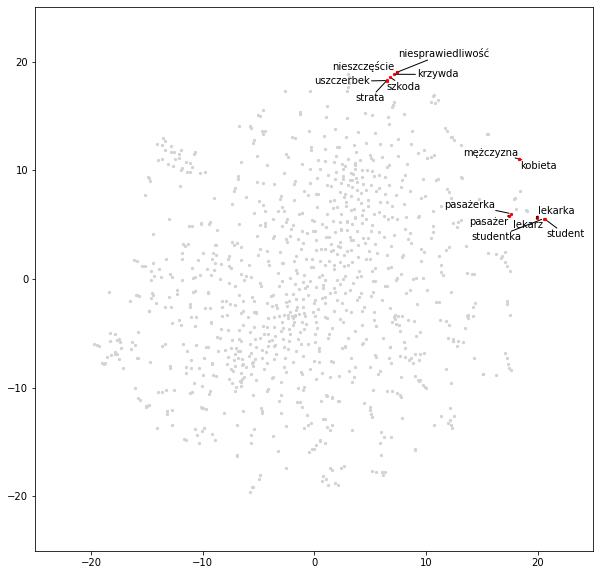

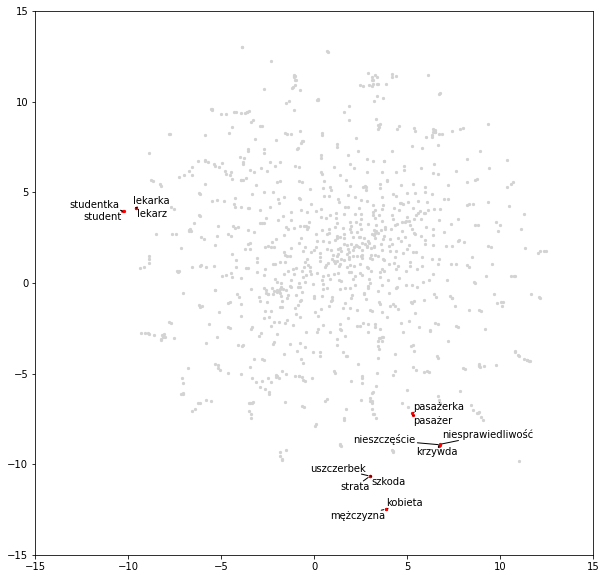

In [7]:
words = [
    'szkoda',
    'strata',
    'uszczerbek',
    'krzywda',
    'niesprawiedliwość',
    'nieszczęście',
    'kobieta',
    'mężczyzna',
    'pasażer',
    'pasażerka',
    'student',
    'studentka',
    'lekarz',
    'lekarka',
]

def plot_with_tsne(w2v, given_words: List[str], lim: int):
    random.seed(1)
    random_words = random.sample(list(w2v.wv.vocab.keys()), 1000)
    vectors = [w2v[word] for word in given_words + random_words]
    vectors_2d = TSNE(n_components=2, random_state=1).fit_transform(vectors)
    given_vectors_2d = vectors_2d[:len(given_words)]
    random_vectors_2d = vectors_2d[len(given_words):]

    plt.figure(figsize=(10, 10))
    plt.xlim(-lim, lim)
    plt.ylim(-lim, lim)
    plt.scatter(random_vectors_2d[:, 0], random_vectors_2d[:, 1], c='lightgrey', s=5)
    plt.scatter(given_vectors_2d[:, 0], given_vectors_2d[:, 1], c='red', s=5)
    annotations = [plt.text(x, y, word, ha='center', va='center')
                for word, (x, y) in zip(given_words, given_vectors_2d)]
    adjust_text(annotations, arrowprops=dict(arrowstyle='-', color='black'))
    plt.show()

plot_with_tsne(w2v_100, words, lim=25)
plot_with_tsne(w2v_300, words, lim=15)

### Pytania

1. Compare results for all experiments with respect to the employed models (100 and 300-d)?
   
   W większości eksperymetów oba modele zwróciły bardzo podobne wyniki.
   Jako drobne różnice można wskazać:
   - 300-wymiarowy model lepiej poradził sobie z "pilot + kobieta - mężczyzna" ("pilotka" na 2. miejscu),
   - 100-wymiarowy model lepiej poradził sobie z "samochód + rzeka - droga" ("jeep" na 2. miejscu).
   
2. Compare results for singe words and MWEs.
   
   Dla pojedynczych słów wyniki zawierają wiele prawdziwych synonimów.
   
   Dla wyrażeń wielowyrazowych w wynikach na pierwszych miejscach znalazły się wyrazy składowe z tych wyrażeń (np. "szkoda majątkowy" -> "szkoda"). Na kolejnych miejscach znalazły się głównie wyrazy podobne do wyrazów składowych traktowanych osobno.
   
   Z ciekawszych wyników mamy "sąd najwyższy" -> "trybunał" oraz "sprawiedliwość". 
   
   Prawdopodobne źródła problemu:
   - Niektóre synonimy także mogą być wyrażeniami wielowyrazowymi i nie jesteśmy w stanie odpytać o nie modelu.
   - Liczymy średnią z wektorów dwóch słów, które często są różnymi częściami mowy. Dla pojedynczych słów zwracane były synonimy będące tę samą częścią mowy (np. "szkoda" (rzeczownik) -> "uszczerbek" (rzeczownik)). Gdy uśrednimy rzeczownik i przymiotnik wyniki stają się nieprzewidywalne.
   
3. How the results for MWEs could be improved?
   
   - Od wyników dla wyrażenia wielowyrazowego można by odfiltrować wyniki otrzymane dla pojedynczych wyrazów, z których to wyrażenie się składa.
   - Można by spróbować wygenerować wyrażenia wielowyrazowe podobne do wyrażeń wielowyrazowych, np. "sąd najwyższy" -> "trybunał sprawiedliwości". Zauważmy, że w wynikach mamy już "sąd najwyższy" -> "trybunał" i "sąd najwyższy" -> "sprawiedliwość". Moglibyśmy wygenerować pary wyrazów z jednowyrazowych wyników, a następnie sprawdzić w jakimś słowniku wyrażeń wielowyrazowych czy one istnieją ("trybunał sprawiedliwości" zostałby znaleziony w słowniku, a "rejonowy okręgowy" nie)
   
4. Are the results for albegraic operations biased?
   
   Tak. Niektóre wyniki bazują na stereotypach dotyczących zawodów (np. pilot —
stewardesa, lekarz — pielęgniarka, lekarz — położna).
   
5. According to t-SNE: do representations of similar word cluster together?
   
   Tak. Dla obu modeli możemy zaobserwować, że podobne słowa znajdują się koło siebie, np.:
   - lekarz, lekarka;
   - student, studentka;
   - nieszczęście, niesprawiedliwość, krzywda.